# Data Preprocessing: Videos

This notebook focuses on the multimedia preprocessing steps for the model development.

In [25]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import librosa
import librosa.display
import pandas as pd
import mediapipe as mp

## Landmark Extraction from Video

In this simulation, we replicate the process a user would undergo when uploading a video. To effectively extract landmarks from a video file, the procedure is segmented into the following steps:

1. Transform the video into a sequence of static images and store them temporarily in an interim directory. For the sake of efficiency, we capture and save images at half-second intervals.
2. Retrieve landmarks from each image and compile the data into a DataFrame, encapsulating the choreography in numbers.

In [ ]:
video_path = 'data/external/testing/tjasaskubic2.mp4'
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

fps = cap.get(cv2.CAP_PROP_FPS)
interval = 0.5 * fps

frame_count = 0
image_count = 0
while cap.isOpened():
    ret, frame = cap.read()
    if ret:
        if frame_count % interval < 1:
            cv2.imwrite(f'data/interim/testing/tjasaskubic2/{frame_count:05d}.png', frame)
            image_count += 1
        frame_count += 1
    else:
        break

cap.release()

print(f"Total frames extracted: {image_count}, Total frame count {frame_count}, {fps}")

In [ ]:
def extract_static_poses(directory_path):
    mp_pose = mp.solutions.pose
    landmarks_data = []

    # Get all image filenames and sort them
    image_files = [f for f in os.listdir(directory_path) if f.endswith(".png")]
    image_files.sort()  # Sorts the files alphabetically

    for filename in image_files:
        image_path = os.path.join(directory_path, filename)
        try:
            with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5, model_complexity=2) as pose:
                image = cv2.imread(image_path)
                rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                results = pose.process(rgb_image)

                if results.pose_landmarks:
                    frame_data = [filename]  # Frame identifier
                    for landmark in results.pose_landmarks.landmark:
                        frame_data.append((landmark.x, landmark.y, landmark.z, landmark.visibility))
                    landmarks_data.append(frame_data)
        except Exception as e:
            logger.error(f"Error processing {image_path}: {e}")

    # Creating DataFrame
    num_landmarks = 33  # Change if different
    column_names = ['Frame']
    column_names.extend([f'Landmark_{i}' for i in range(num_landmarks)])
    landmarks_df = pd.DataFrame(landmarks_data, columns=column_names)

    return landmarks_df

landmarks_df2 = extract_static_poses('data/interim/testing/tjasaskubic2/')

In [27]:
landmarks_df2[['Frame','Landmark_0']]

,Frame,Landmark_0
0,00000.png,"(0.3414810299873352, 0.4328925311565399, 0.149..."
1,00015.png,"(0.4715697169303894, 0.4627968370914459, 0.026..."
2,00030.png,"(0.619809627532959, 0.44991734623908997, -0.36..."
3,00045.png,"(0.582895815372467, 0.42544108629226685, -0.21..."
4,00060.png,"(0.2977669835090637, 0.4496392011642456, 0.118..."
...,...,...
76,01140.png,"(0.6289330124855042, 0.41447198390960693, -0.0..."
77,01155.png,"(0.6474101543426514, 0.4309401214122772, 0.019..."
78,01170.png,"(0.6289518475532532, 0.42914217710494995, -0.2..."
79,01185.png,"(0.6274430155754089, 0.41791045665740967, -0.1..."


### Plotting Choreography in Points

1. Aggregated Points
To be continued.

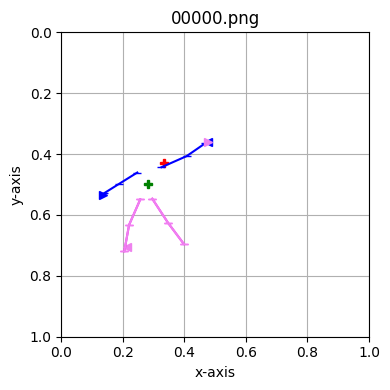

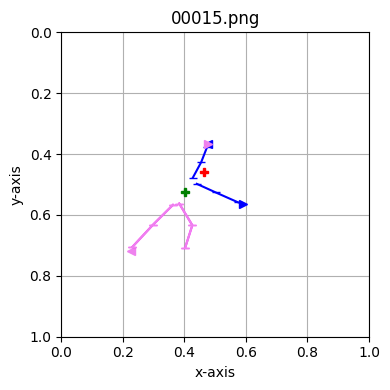

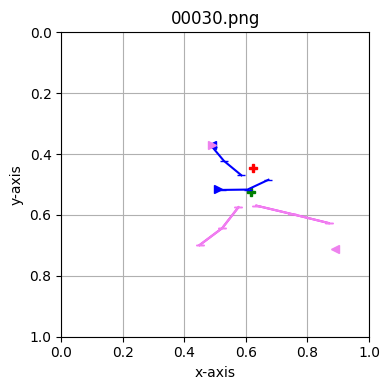

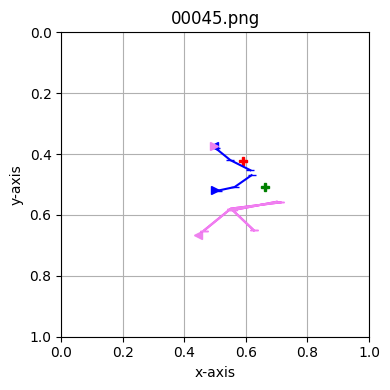

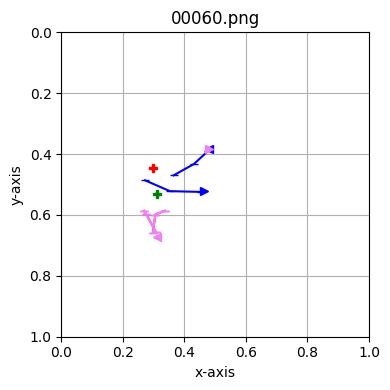

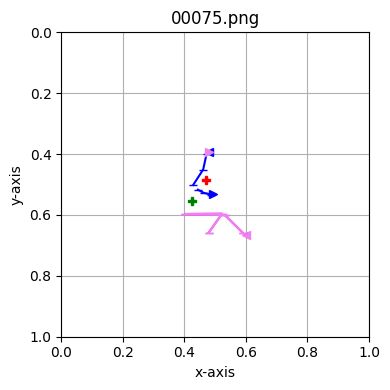

In [29]:
num_landmarks = 33  # Assuming 33 landmarks

# Loop over each frame
for i, row in landmarks_df2.iterrows():
    x_values = []
    y_values = []

    # Extract x and y values for all landmarks
    for j in range(num_landmarks):
        x,y,z,v = row[f'Landmark_{j}']
        x_values.append(x)
        y_values.append(y)

    np_x = np.array(x_values)
    np_y = np.array(y_values)

    head_x, head_y = np_x[0:11].mean(), np_y[0:11].mean()
    torso_x = (np_x[11] + np_x[12] + np_x[24] + np_x[23])/4
    torso_y = (np_y[11] + np_y[12] + np_y[24] + np_y[23])/4
    handL_x = (np_x[15] + np_x[17] + np_x[19] + np_x[21])/4
    handL_y = (np_y[15] + np_y[17] + np_y[19] + np_y[21])/4
    handR_x = (np_x[16] + np_x[18] + np_x[20] + np_x[22])/4
    handR_y = (np_y[16] + np_y[18] + np_y[20] + np_y[22])/4
    footL_x = (np_x[16] + np_x[18] + np_x[20] + np_x[22])/4
    footL_y = (np_y[16] + np_y[18] + np_y[20] + np_y[22])/4

    footR_x = (np_x[27] + np_x[29] + np_x[31])/3
    footR_y = (np_y[28] + np_y[30] + np_y[32])/3

    armR_x = [np_x[12],np_x[14],np_x[16]]
    armR_y = [np_y[12],np_y[14],np_y[16]]
    armL_x = [np_x[11],np_x[13],np_x[15]]
    armL_y = [np_y[11],np_y[13],np_y[15]]

    legR_x = [np_x[24],np_x[26],np_x[28]]
    legR_y = [np_y[24],np_y[26],np_y[28]]
    legL_x = [np_x[23],np_x[25],np_x[27]]
    legL_y = [np_y[23],np_y[25],np_y[27]]

    footSoleR_x = [np_x[24],np_x[26],np_x[28]]
    footSoleR_y = [np_y[24],np_y[26],np_y[28]]
    footSoleL_x = [np_x[23],np_x[25],np_x[27]]
    footSoleL_y = [np_y[23],np_y[25],np_y[27]]

    fig, ax = plt.subplots(figsize=(4, 4))

    ax.set_title(row['Frame'])
    ax.plot(head_x, head_y, color=mcolors.CSS4_COLORS['red'], label="head", marker='P')
    ax.plot(torso_x, torso_y, color=mcolors.CSS4_COLORS['green'], label="upper body", marker='P')
    ax.plot(handR_x, handR_y, color=mcolors.CSS4_COLORS['blue'], label="upper body", marker='<')
    ax.plot(handL_x, handL_y, color=mcolors.CSS4_COLORS['blue'], label="upper body", marker='>')
    ax.plot(armR_x, armR_y, color=mcolors.CSS4_COLORS['blue'], label="right arm", marker='_')
    ax.plot(armL_x, armL_y, color=mcolors.CSS4_COLORS['blue'], label="left arm", marker='_')
    ax.plot(footR_x, footR_y, color=mcolors.CSS4_COLORS['violet'], label="lower body", marker='<')
    ax.plot(footL_x, footL_y, color=mcolors.CSS4_COLORS['violet'], label="lower body", marker='>')
    ax.plot(legR_x, legR_y, color=mcolors.CSS4_COLORS['magenta'], label="right legs", marker='_')
    ax.plot(legL_x, legL_y, color=mcolors.CSS4_COLORS['magenta'], label="left legs", marker='_')
    
    ax.plot(footSoleR_x, footSoleR_y, color=mcolors.CSS4_COLORS['violet'], label="right foot sole", marker='_')
    ax.plot(footSoleL_x, footSoleL_y, color=mcolors.CSS4_COLORS['violet'], label="left foot sole", marker='_')
        
    ax.set_xlabel("x-axis")
    ax.set_ylabel("y-axis")
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.invert_yaxis()
    ax.grid()
    
    fig.tight_layout()
    plt.show()

    # Optionally, you can break after the first few frames to avoid generating too many plots
    if i >= 5:
        break

## Audio Analysis

Librosa lets you extract audio features and add more context to the dance gestures analysis.

* Tempo and Beat Times are important audio features that can be used to identify the rhythmic structure and timing of the music in a dance video.
* Full Signal tells us about the sound of the performance, including tempo, rhythm, and melody. This helps us understand how the music and dance movements are synchronized.
* Percussive signal shows us the timing of the dance movements and how they relate to the beat of the music, helping us identify accents. (Behavioral Gestures)
* Harmonic Signal tells us about the emotional and expressive elements of the performance. (Expressive Gestures)

/var/folders/8q/psx_9spx6sn4p06701_g30nh0000gn/T/ipykernel_86044/2993781671.py:8: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(video_url_path)
/usr/local/lib/python3.11/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


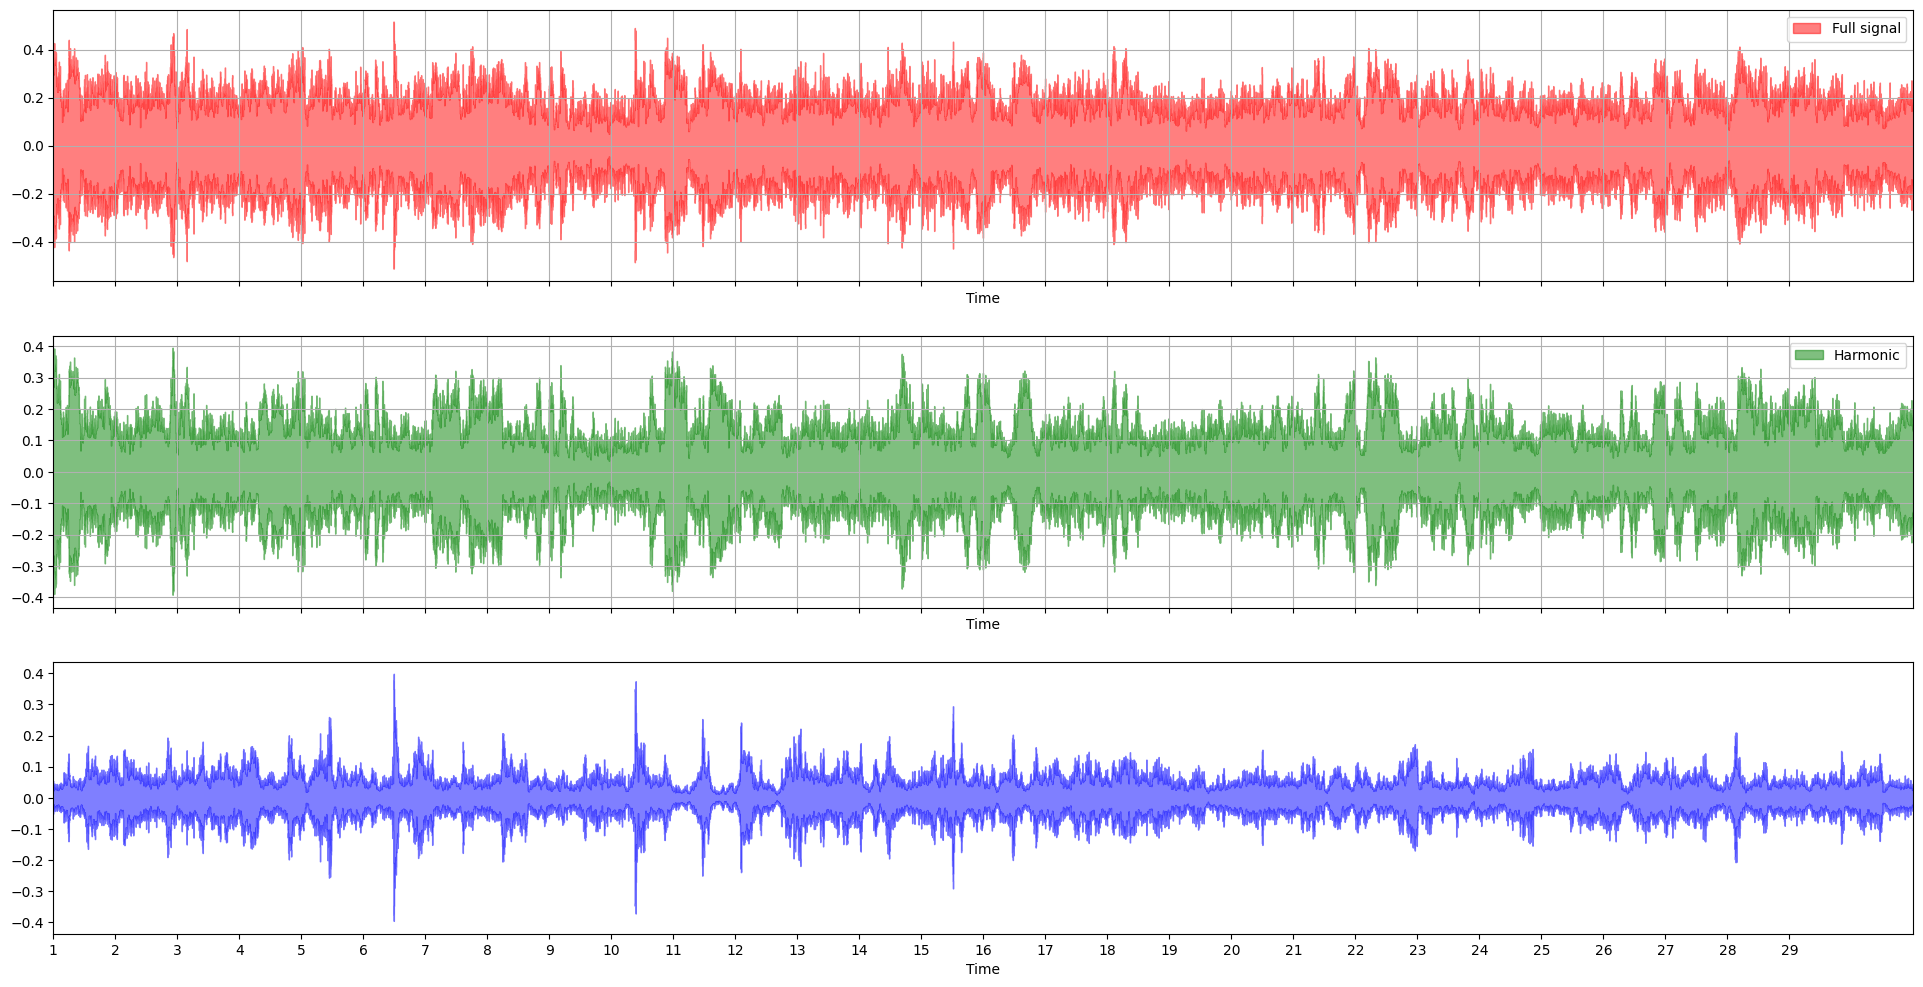

In [8]:
from src.data.audio import extract_tempo_and_beats

audio_path = "data/interim/testing/tjasaskubic1.mp4"

tempo, beat_times = extract_tempo_and_beats(audio_path)

fig, ax = plt.subplots(nrows=3, sharex=True, figsize=(24, 12))
y, sr = librosa.load(video_url_path)
y_harm, y_perc = librosa.effects.hpss(y)
librosa.display.waveshow(y, sr=sr, color='r', alpha=0.5, ax=ax[0], marker='.', label='Full signal')
librosa.display.waveshow(y_harm, sr=sr, color='g', alpha=0.5, ax=ax[1], label='Harmonic')
librosa.display.waveshow(y_perc, sr=sr, color='b', alpha=0.5, ax=ax[2], label='Percussive')
for i in range(2):
    ax[i].set_xlim(2,31)
    ax[i].legend()
    ax[i].set_xticks(np.arange(1, 30, 1))
    ax[i].grid()
plt.show()

## References

* https://github.com/kayesokua/gestures/blob/main/references/README.md